In [22]:
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [23]:
df = pd.read_csv('sao-paulo-properties-april-2019.csv')
df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)
df.columns, df.shape, df.describe()

(Index(['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking',
        'Elevator', 'Furnished', 'Swimming Pool', 'New', 'District',
        'Negotiation Type', 'Property Type'],
       dtype='object'),
 (13640, 14),
               Price         Condo          Size         Rooms       Toilets  \
 count  1.364000e+04  13640.000000  13640.000000  13640.000000  13640.000000   
 mean   2.877378e+05    689.882331     84.373900      2.312023      2.073680   
 std    5.908214e+05    757.649363     58.435676      0.777461      0.961803   
 min    4.800000e+02      0.000000     30.000000      1.000000      1.000000   
 25%    1.858750e+03    290.000000     50.000000      2.000000      2.000000   
 50%    8.100000e+03    500.000000     65.000000      2.000000      2.000000   
 75%    3.600000e+05    835.000000     94.000000      3.000000      2.000000   
 max    1.000000e+07   9500.000000    880.000000     10.000000      8.000000   
 
              Suites       Parking      Elevator  

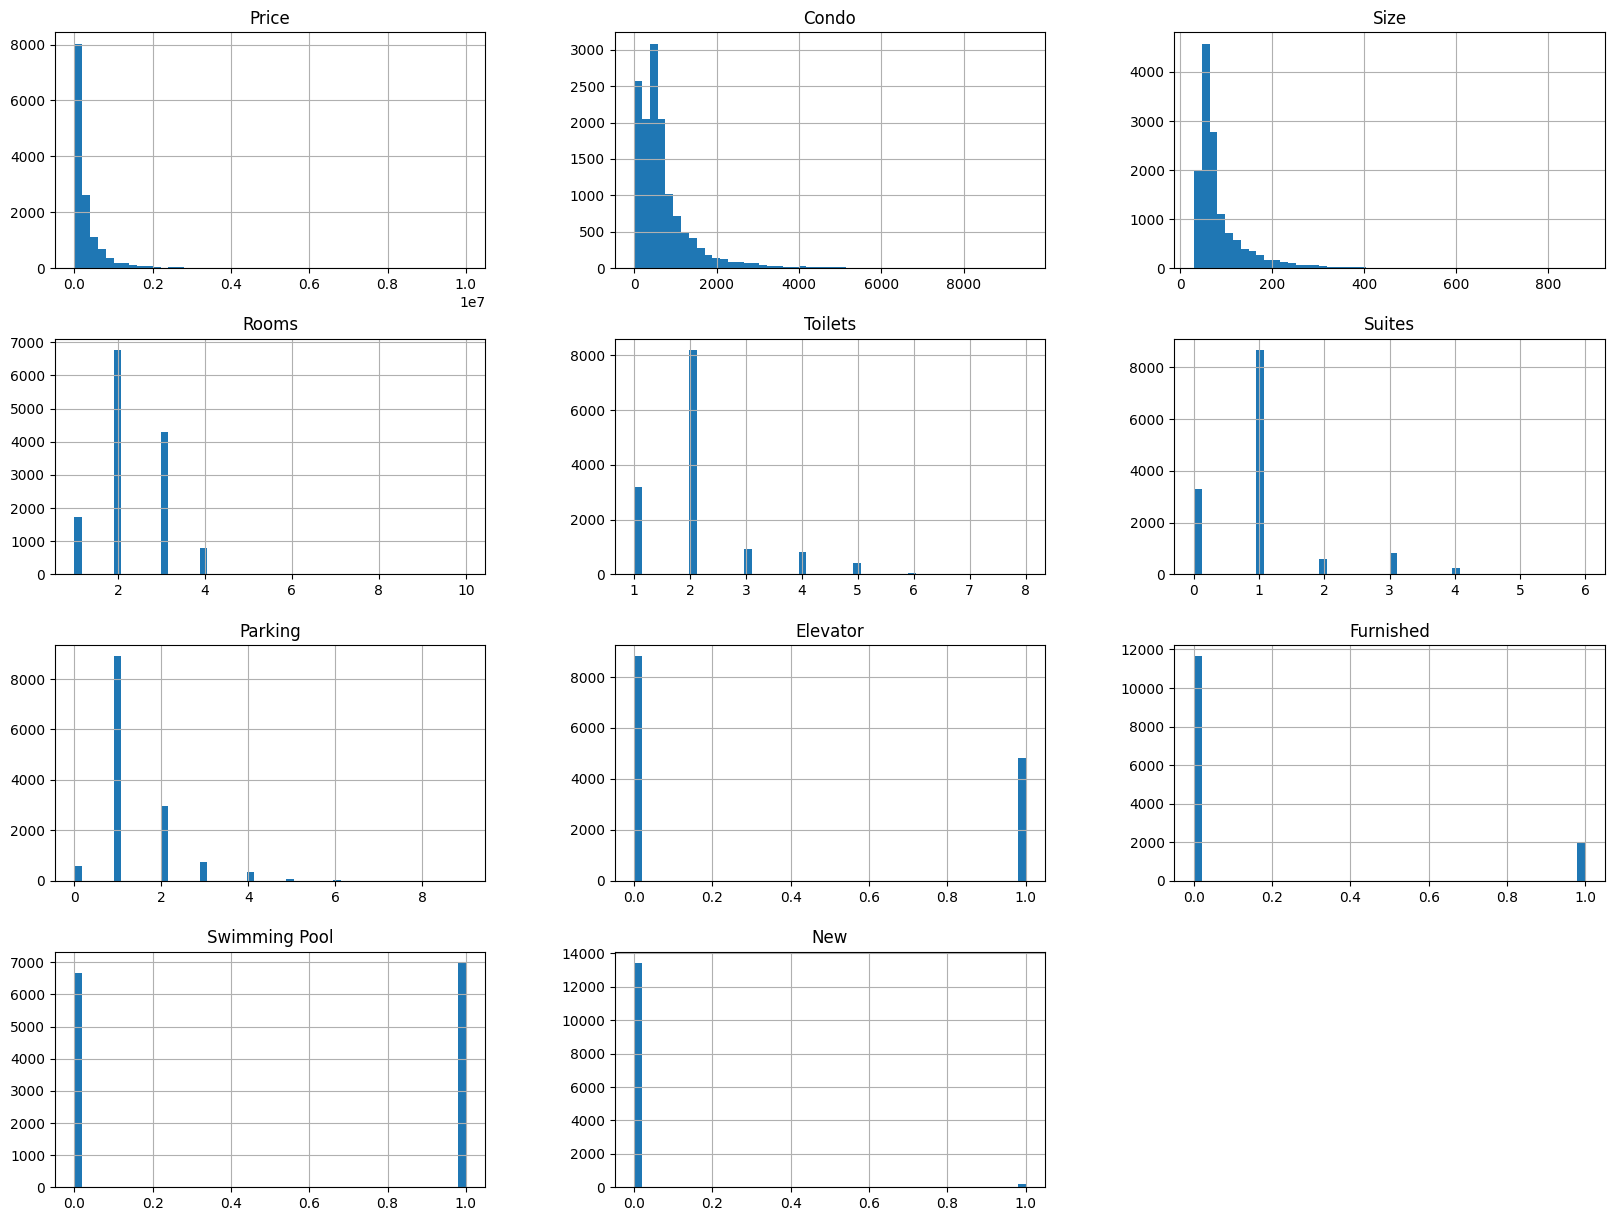

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()


In [25]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
len(train), len(test)

(10912, 2728)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Price'], axis=1), df['Price'], test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(10912, 2728, 10912, 2728)

In [27]:
corr_matrix = df.corr()
corr_matrix = corr_matrix['Price'].sort_values(ascending=False)
corr_matrix

C:\Users\g4bri\AppData\Local\Temp\ipykernel_5960\1045464850.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Price            1.000000
Size             0.378450
Toilets          0.341887
Parking          0.337959
Suites           0.313267
Rooms            0.272267
Condo            0.203857
Swimming Pool    0.131494
Elevator         0.102495
New              0.033812
Furnished       -0.006385
Name: Price, dtype: float64

In [29]:
# encoding the 'New', 'Negotiation Type', 'Property Type' columns using OneHotEncoder 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_attribs = ['New', 'Negotiation Type', 'Property Type']
num_attribs = list(df.drop(['New', 'Negotiation Type', 'Property Type', 'Price'], axis=1))
 
full_pipeline = ColumnTransformer([
        ("num", preprocessing.StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
])

X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)
 
X_train_prepared.shape, X_test_prepared.shape

ValueError: could not convert string to float: 'Jardim Paulista/São Paulo'